https://datahack.analyticsvidhya.com/contest/ltfs-datascience-finhack-an-online-hackathon

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
df_train_in = pd.read_csv('data/train.csv')
df_test_in = pd.read_csv('data/test_bqCt9Pv.csv')

In [4]:
df_test_in['loan_default'] = -1
df = pd.concat(( df_train_in, df_test_in ))

In [5]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
df_train_in.shape, df_test_in.shape

((233154, 41), (112392, 41))

In [7]:
sum(df_train_in['loan_default'])/len(df_train_in['loan_default'])

0.2170711203753742

In [8]:
1/sum(df_train_in['loan_default'])/len(df_train_in['loan_default'])


8.474463450223624e-11

In [9]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,345546.000000,345546.000000,3.455460e+05,345546.00000,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,345546.0,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,3.455460e+05,3.455460e+05,3.455460e+05,345546.000000,345546.000000,345546.000000,3.455460e+05,3.455460e+05,3.455460e+05,3.455460e+05,3.455460e+05,345546.000000,345546.000000,345546.000000,345546.000000
mean,593106.042648,54916.377391,7.629484e+04,74.92991,74.876752,19705.205342,68.812725,3272.345381,7.247122,1621.741403,1.0,0.849852,0.113311,0.137148,0.021117,0.002058,289.032062,2.371201,1.003586,0.155146,1.602702e+05,2.096509e+05,2.095608e+05,0.047528,0.022709,0.005921,4.565299e+03,6.133302e+03,6.038715e+03,1.249773e+04,2.727354e+02,0.360065,0.095660,0.212959,-0.178792
std,101481.557990,13045.957158,1.873864e+04,11.31522,70.426229,3513.984528,22.142130,2240.489856,4.547494,1024.408918,0.0,0.357217,0.316972,0.344004,0.143776,0.045314,338.841228,5.013630,1.877087,0.543333,9.253457e+05,2.043866e+06,2.047483e+06,0.561836,0.283288,0.100497,1.612026e+05,1.893427e+05,1.889114e+05,1.997545e+05,1.626126e+04,0.920797,0.383594,0.717365,0.663144
min,417428.000000,11613.000000,3.700000e+04,10.03000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,-4.815000e+05,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-1.000000
25%,505386.250000,47645.000000,6.628200e+04,69.28000,15.000000,16565.000000,45.000000,1449.000000,4.000000,737.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-1.000000
50%,592918.500000,54303.000000,7.154100e+04,77.14000,64.000000,20470.000000,86.000000,2790.000000,6.000000,1511.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,680501.750000,60947.000000,7.960500e+04,83.69000,135.000000,23049.000000,86.000000,5458.000000,10.000000,2470.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,3.000000,1.000000,0.000000,3.136450e+04,5.941675e+04,5.764575e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.946000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,769909.000000,990572.000000,1.628992e+06,95.00000,261.000000,24901.000000,156.000000,7345.000000,22.000000,3923.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,57.000000,36.000000,8.000000,3.603285e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,35.000000,20.000000,36.000000,1.000000


In [10]:
df.astype('object').describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
count,345546,345546,345546,345546.0,345546,345546,345546,345546,345546,334442,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546,345546
unique,345546,29271,53158,6819.0,82,3089,12,7096,15888,2,111,22,3398,1,2,2,2,2,2,574,20,114,42,23,97465,60681,65673,40,23,9,3947,2631,3031,34330,2295,26,16,200,307,26,3
top,524287,53303,68000,85.0,2,15694,86,2578,01-01-88,Self employed,31-10-18,4,2546,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
freq,1,3131,852,5910.0,20527,1916,161203,2681,3230,187429,8826,70438,757,345546,293663,306392,298155,338249,344835,174843,174843,174843,205427,306917,212468,207051,207188,338438,340894,343928,341430,340989,341028,236874,342841,272341,319144,177481,177178,298020,182543


In [11]:
sum(df.MobileNo_Avl_Flag)

345546

### Feature engineering

In [12]:
df['is_self_employed'] = df['Employment.Type'].apply(lambda x: 1 if x == "Self employed" else 0)

In [13]:
from datetime import datetime as dt

In [14]:
df['dob'] = df['Date.of.Birth'].apply(lambda d: dt.strptime(d, '%d-%m-%y').date().toordinal())
df['disbursal_date'] = df['DisbursalDate'].apply(lambda d: dt.strptime(d, '%d-%m-%y').date().toordinal())

In [15]:
def parse_yrs_mon(cred):
    try:
        yr, mn = cred.split()
        yr = int(yr[:-3])
        mn = int(mn[:-3])/12.0
        return yr + mn
    except:
        print(cred)
        return 0.0
    
print(parse_yrs_mon("12yrs 11mon"))

12.916666666666666


In [16]:
df['credit_history_length'] = df['CREDIT.HISTORY.LENGTH'].apply(parse_yrs_mon)
df['avg_acct_age'] = df['AVERAGE.ACCT.AGE'].apply(parse_yrs_mon)

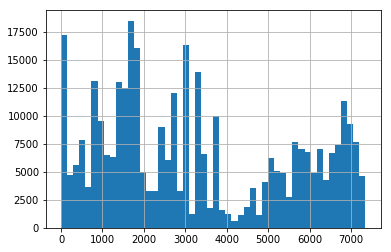

In [17]:
df['Current_pincode_ID'].hist(bins=50)
# ??? Doesn't seem random we should maybe keep it

In [18]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

In [19]:
# from sklearn.preprocessing import LabelEncoder
# cns_encoder = LabelEncoder()
# df_train['cns_encoded'] = cns_encoder.fit_transform(df_train['PERFORM_CNS.SCORE.DESCRIPTION'])
# df_test['cns_encoded'] = cns_encoder.fit_transform(df_train['PERFORM_CNS.SCORE.DESCRIPTION'])

In [20]:
cns_dummies = pd.get_dummies(df['PERFORM_CNS.SCORE.DESCRIPTION'], prefix = 'cns')
df = pd.concat([df, cns_dummies], axis=1)

In [21]:
df['Employment.Type'].head()

0         Salaried
1    Self employed
2    Self employed
3    Self employed
4    Self employed
Name: Employment.Type, dtype: object

In [22]:
to_dump = ['UniqueId', 'MobileNo_Avl_Flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'Employment.Type']
to_cat = ['branch_id', 'supplier_id', 'manufacturer_id', 'State_ID', 'Employee_code_ID']
to_date = ['Date.of.Birth', 'DisbursalDate']
to_bool = ['is_self_employed', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']
to_custom = ['CREDIT.HISTORY.LENGTH', 'AVERAGE.ACCT.AGE']

In [23]:
all_to_delete = to_dump
all_to_delete.extend(to_cat)
all_to_delete.extend(to_date)
all_to_delete.extend(to_custom)

In [24]:
all_to_delete

['UniqueId',
 'MobileNo_Avl_Flag',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'Employment.Type',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'State_ID',
 'Employee_code_ID',
 'Date.of.Birth',
 'DisbursalDate',
 'CREDIT.HISTORY.LENGTH',
 'AVERAGE.ACCT.AGE']

In [25]:
cols_to_keep = set(df.columns) - set(all_to_delete)

In [26]:
df[list(cols_to_keep)].head(20)

,SEC.SANCTIONED.AMOUNT,cns_H-Medium Risk,PRI.OVERDUE.ACCTS,cns_E-Low Risk,avg_acct_age,Current_pincode_ID,cns_K-High Risk,SEC.INSTAL.AMT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,disbursed_amount,cns_No Bureau History Available,cns_Not Scored: No Updates available in last 36 months,cns_G-Low Risk,PERFORM_CNS.SCORE,PRI.CURRENT.BALANCE,cns_B-Very Low Risk,cns_Not Scored: Sufficient History Not Available,NO.OF_INQUIRIES,SEC.OVERDUE.ACCTS,UniqueID,cns_Not Scored: Not Enough Info available on the customer,cns_F-Low Risk,ltv,cns_I-Medium Risk,cns_A-Very Low Risk,...,cns_M-Very High Risk,SEC.ACTIVE.ACCTS,VoterID_flag,PRI.ACTIVE.ACCTS,PRI.DISBURSED.AMOUNT,cns_Not Scored: Only a Guarantor,PAN_flag,is_self_employed,loan_default,PRIMARY.INSTAL.AMT,SEC.DISBURSED.AMOUNT,cns_L-Very High Risk,cns_Not Scored: More than 50 active Accounts found,PRI.SANCTIONED.AMOUNT,dob,Driving_flag,cns_C-Very Low Risk,cns_D-Very Low Risk,NEW.ACCTS.IN.LAST.SIX.MONTHS,disbursal_date,Aadhar_flag,Passport_flag,PRI.NO.OF.ACCTS,cns_Not Scored: No Activity seen on the customer (Inactive),SEC.CURRENT.BALANCE
0,0,0,0,0,0.000000,1441,0,0,0,50578,1,0,0,0,0,0,0,0,0,420825,0,0,89.55,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,724276,0,0,0,0,736909,1,0,0,0,0
1,0,0,1,0,1.916667,1502,0,0,1,47145,0,0,0,598,27600,0,0,0,0,537409,0,0,73.23,1,0,...,0,0,0,1,50200,0,0,1,1,1991,0,0,0,50200,724853,0,0,0,0,736963,1,0,1,0,0
2,0,0,0,0,0.000000,1497,0,0,0,53278,1,0,0,0,0,0,0,0,0,417566,0,0,89.63,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,724877,0,0,0,0,736907,1,0,0,0,0
3,0,0,0,0,0.666667,1501,0,0,0,57513,0,0,0,305,0,0,0,1,0,624493,0,0,88.48,0,0,...,0,0,0,0,0,0,0,1,1,31,0,1,0,0,727927,0,0,0,0,736993,1,0,3,0,0
4,0,0,0,0,0.000000,1495,0,0,0,52378,1,0,0,0,0,0,0,1,0,539055,0,0,88.39,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,722062,0,0,0,0,736963,1,0,0,0,0
5,0,0,0,0,1.750000,1501,0,0,0,54513,0,0,0,825,0,0,0,0,0,518279,0,0,89.66,0,1,...,0,0,0,0,0,0,0,1,0,1347,0,0,0,0,726718,0,0,0,0,736956,1,0,2,0,0
6,0,0,0,0,0.000000,1502,0,0,0,46349,1,0,0,0,0,0,0,0,0,529269,0,0,76.42,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,725889,0,0,0,0,736960,1,0,0,0,0
7,0,0,0,0,0.166667,1501,0,0,0,43894,0,0,0,17,72879,0,0,0,0,510278,1,0,71.89,0,0,...,0,0,0,1,74500,0,0,0,0,0,0,0,0,74500,726379,0,0,0,0,736953,1,0,1,0,0
8,0,0,0,0,4.666667,1497,0,0,0,53713,0,0,0,718,-41,0,0,1,0,490213,0,0,89.56,0,0,...,0,0,0,1,365384,0,0,1,0,0,0,0,0,365384,727151,0,0,1,0,736942,1,0,1,0,0
9,0,0,0,0,1.583333,1492,0,0,0,52603,0,0,0,818,0,0,0,0,0,510980,0,0,86.95,0,1,...,0,0,1,0,0,0,0,0,0,2608,0,0,0,0,755109,0,0,0,0,736953,0,0,1,0,0


In [27]:
for col in cols_to_keep:
    if col not in ['loan_default', 'UniqueID']:
         # Normalise the other fields so all fields are between -/+ 1 standard deviation
        mean = df[col].mean(axis=0)
        df[col] -= mean
        std = df[col].std(axis=0)
        df[col] /= std

In [28]:
x_cols = list(cols_to_keep)
# x_cols.remove('loan_default')
# y_cols = 'loan_default'

In [29]:
df[x_cols].isna().any()

SEC.SANCTIONED.AMOUNT                                          False
cns_H-Medium Risk                                              False
PRI.OVERDUE.ACCTS                                              False
cns_E-Low Risk                                                 False
avg_acct_age                                                   False
Current_pincode_ID                                             False
cns_K-High Risk                                                False
SEC.INSTAL.AMT                                                 False
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS                            False
disbursed_amount                                               False
cns_No Bureau History Available                                False
cns_Not Scored: No Updates available in last 36 months         False
cns_G-Low Risk                                                 False
PERFORM_CNS.SCORE                                              False
PRI.CURRENT.BALANCE               

In [30]:
df_train = df[df['loan_default'] != -1]
df_test = df[df['loan_default'] == -1]

In [31]:
df_train.shape, df_test.shape

((233154, 66), (112392, 66))

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(df_train[x_cols], df_train[y_cols], 
#                                                     test_size=0.2, 
#                                                     random_state=42)

In [33]:
#df_train[list(cols_to_keep)]['UniqueID']

### XGboost Gridsearch

In [34]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn import metrics

In [35]:
target = 'loan_default'
IDcol = 'UniqueID'

In [36]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=10)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['loan_default'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['loan_default'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['loan_default'], dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [37]:
#Choose all predictors except target & IDcols
predictors = [x for x in cols_to_keep if x not in [target, IDcol]]
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    n_jobs=6,
    scale_pos_weight=8.4,
    seed=42)
modelfit(xgb1, df_train, predictors)

[0]	train-auc:0.607554+0.00936586	test-auc:0.603956+0.0068954
[10]	train-auc:0.645353+0.00122152	test-auc:0.637536+0.00388921
[20]	train-auc:0.65541+0.00111044	test-auc:0.645383+0.00341112
[30]	train-auc:0.663965+0.00128709	test-auc:0.6513+0.00338024
[40]	train-auc:0.670226+0.00160046	test-auc:0.655031+0.00268031
[50]	train-auc:0.674904+0.00120921	test-auc:0.657322+0.00304007
[60]	train-auc:0.678906+0.00111077	test-auc:0.659113+0.00334144
[70]	train-auc:0.682074+0.00113362	test-auc:0.660175+0.0033029
[80]	train-auc:0.685016+0.00112959	test-auc:0.661133+0.00343731
[90]	train-auc:0.687625+0.00100171	test-auc:0.661661+0.00353555
[100]	train-auc:0.689834+0.000888567	test-auc:0.662315+0.00366341
[110]	train-auc:0.692048+0.00097081	test-auc:0.662773+0.00364164
[120]	train-auc:0.694265+0.0011238	test-auc:0.663166+0.00345736
[130]	train-auc:0.696138+0.00115227	test-auc:0.663349+0.00355468
[140]	train-auc:0.697911+0.000986406	test-auc:0.66369+0.00371605
[150]	train-auc:0.699611+0.000988261	test

### Tune max_depth and min_child_weight

In [38]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27), 
    param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df_train[predictors],df_train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
#             metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=10)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [40]:
gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 5}

In [45]:
param_test2 = {
    'max_depth':[4,5,6],
    'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27), 
    param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df_train[predictors],df_train[target])
gsearch2.best_params_

{'max_depth': 4, 'min_child_weight': 6}

In [46]:
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140,
    gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27,
    max_depth=4, min_child_weight=6), 
    param_grid = param_test3, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch3.fit(df_train[predictors],df_train[target])
gsearch3.best_params_

{'gamma': 0.3}

In [47]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140,
    subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27,
    max_depth=4, min_child_weight=6, gamma=0), 
    param_grid = param_test4, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch4.fit(df_train[predictors],df_train[target])
gsearch4.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.7}

In [48]:
param_test5 = {
    'subsample':[0.65, 0.7, 0.75],
    'colsample_bytree':[0.65, 0.7, 0.75]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140,
    subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27,
    max_depth=4, min_child_weight=6, gamma=0), 
    param_grid=param_test5, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch5.fit(df_train[predictors],df_train[target])
gsearch5.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.7}

In [49]:
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140,
    subsample=0.7, colsample_bytree=0.7,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27,
    max_depth=4, min_child_weight=6, gamma=0), 
    param_grid=param_test6, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch6.fit(df_train[predictors],df_train[target])
gsearch6.best_params_

{'reg_alpha': 100}

In [50]:
param_test7 = {
    'reg_alpha':[50, 100, 150]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140,
    subsample=0.7, colsample_bytree=0.7,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27,
    max_depth=4, min_child_weight=6, gamma=0), 
    param_grid=param_test7, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch7.fit(df_train[predictors],df_train[target])
gsearch7.best_params_

{'reg_alpha': 100}

In [ ]:
param_test7 = {
    'reg_alpha':[50, 100, 150]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140,
    subsample=0.7, colsample_bytree=0.7,
    objective= 'binary:logistic', nthread=6, scale_pos_weight=8.4, seed=27,
    max_depth=4, min_child_weight=6, gamma=0), 
    param_grid=param_test7, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch7.fit(df_train[predictors],df_train[target])
gsearch7.best_params_

In [51]:
#Choose all predictors except target & IDcols
xgb8 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=140,
    subsample=0.7,
    colsample_bytree=0.7,
    objective= 'binary:logistic',
    nthread=6,
    scale_pos_weight=8.4,
    seed=27,
    max_depth=4,
    min_child_weight=6,
    gamma=0
)
modelfit(xgb8, df_train, predictors)

[0]	train-auc:0.609394+0.000726629	test-auc:0.606299+0.00431848
[10]	train-auc:0.636754+0.00289071	test-auc:0.63271+0.00339507
[20]	train-auc:0.645734+0.00117105	test-auc:0.640363+0.00325149
[30]	train-auc:0.653241+0.000698516	test-auc:0.646711+0.00384403
[40]	train-auc:0.659076+0.00100018	test-auc:0.651254+0.00335593
[50]	train-auc:0.662968+0.00093517	test-auc:0.653957+0.00343213
[60]	train-auc:0.665819+0.00100645	test-auc:0.655741+0.00360906
[70]	train-auc:0.668381+0.00117364	test-auc:0.657372+0.00327072
[80]	train-auc:0.670868+0.00136968	test-auc:0.658772+0.0031551
[90]	train-auc:0.672922+0.00134195	test-auc:0.659685+0.00322803
[100]	train-auc:0.674658+0.00133266	test-auc:0.66048+0.00336015
[110]	train-auc:0.676293+0.00123633	test-auc:0.661257+0.0035775
[120]	train-auc:0.677757+0.00116379	test-auc:0.66177+0.00359736
[130]	train-auc:0.679149+0.00117568	test-auc:0.662303+0.00365395
[139]	train-auc:0.68032+0.000996655	test-auc:0.662626+0.00376389

Model Report
Accuracy : 0.3219
AUC Sco

In [57]:
#Choose all predictors except target & IDcols
xgb8 = XGBClassifier(
    learning_rate=0.01,
    n_estimators=140,
    subsample=0.7,
    colsample_bytree=0.7,
    objective= 'binary:logistic',
    nthread=6,
    scale_pos_weight=1,
    seed=27,
    max_depth=4,
    min_child_weight=6,
    gamma=0
)
modelfit(xgb8, df_train, predictors)

[0]	train-auc:0.611668+0.00153359	test-auc:0.608803+0.00300232
[10]	train-auc:0.631225+0.00272459	test-auc:0.627736+0.0038214
[20]	train-auc:0.633709+0.00162682	test-auc:0.629922+0.00297688
[30]	train-auc:0.634769+0.00131575	test-auc:0.630838+0.0036459
[40]	train-auc:0.635932+0.00129506	test-auc:0.631689+0.0035775
[50]	train-auc:0.636943+0.00135644	test-auc:0.632629+0.00388746
[60]	train-auc:0.637475+0.00123975	test-auc:0.633108+0.00422211
[70]	train-auc:0.638289+0.00130039	test-auc:0.633919+0.00420436
[80]	train-auc:0.639047+0.00104911	test-auc:0.634603+0.00414037
[90]	train-auc:0.63945+0.0010408	test-auc:0.635032+0.00420011
[100]	train-auc:0.640034+0.000948543	test-auc:0.635602+0.00411942
[110]	train-auc:0.640728+0.000784888	test-auc:0.636163+0.00430921
[120]	train-auc:0.641245+0.00102943	test-auc:0.636666+0.00407203
[130]	train-auc:0.641916+0.000975583	test-auc:0.637263+0.00399518
[139]	train-auc:0.642435+0.000939737	test-auc:0.637663+0.00402355

Model Report
Accuracy : 0.7829
AUC S

In [58]:
predictions = xgb8.predict_proba(df_test[predictors])

In [59]:
submission = pd.DataFrame()
submission['UniqueID'] = df_test['UniqueID']

In [60]:
submission['loan_default'] = predictions[:,1]
submission.head()

,UniqueID,loan_default
0,655269,0.339714
1,723482,0.322102
2,758529,0.355418
3,763449,0.320745
4,708663,0.347641


In [61]:
filename = 'submission1.csv'
submission.to_csv(filename, index=False)
import gzip
import shutil
with open(filename, 'rb') as f_in:
    with gzip.open(filename + '.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)